In [1]:
!pip install torch torchvision scikit-learn matplotlib numpy

SVM Image Classification with Online Dataset


100%|██████████| 9.91M/9.91M [00:00<00:00, 61.0MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.69MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.7MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.80MB/s]


Processing training data...
Processing test data...

MNIST Dataset Loaded Successfully!
Training set size: 5000
Test set size: 1000
Number of classes: 10
Feature dimensions: 784

Visualizing sample images...


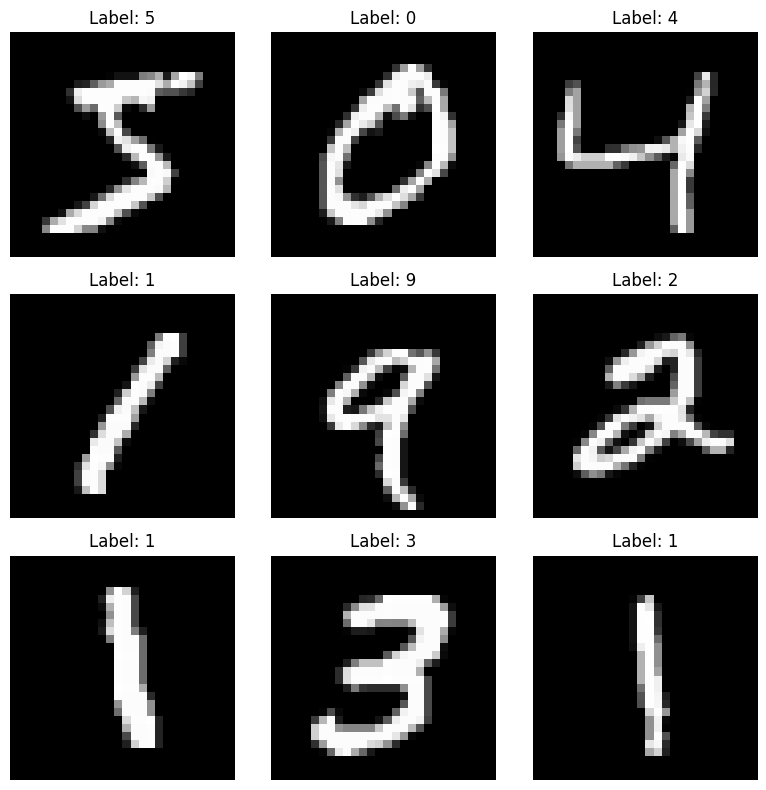


Initializing SVM classifier...
Training SVM model (this may take a few minutes)...
Model training completed!

Evaluating model performance...

Accuracy: 0.9170

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94        85
           1       0.99      0.98      0.99       126
           2       0.91      0.91      0.91       116
           3       0.91      0.90      0.91       107
           4       0.92      0.92      0.92       110
           5       0.94      0.91      0.92        87
           6       0.96      0.91      0.93        87
           7       0.85      0.93      0.89        99
           8       0.88      0.87      0.87        89
           9       0.88      0.86      0.87        94

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.92      0.92      0.92      1000


Confusion Matrix:
[[ 82   0   0   0   0   1   2   0   0

In [2]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
from torchvision import datasets, transforms
import torch
import matplotlib.pyplot as plt

class SVMImageClassifier:
    def __init__(self, kernel='rbf', C=1.0):
        """
        Initialize SVM classifier

        Args:
            kernel: SVM kernel type ('linear', 'rbf', 'poly', etc.)
            C: Regularization parameter
        """
        self.svm = SVC(kernel=kernel, C=C)
        self.scaler = StandardScaler()
        self.is_fitted = False

    def train(self, X_train, y_train):
        """
        Train the SVM classifier

        Args:
            X_train: Training features (flattened images)
            y_train: Training labels
        """
        # Normalize features
        X_scaled = self.scaler.fit_transform(X_train)

        # Train SVM
        self.svm.fit(X_scaled, y_train)
        self.is_fitted = True
        print("Model training completed!")

    def predict(self, X_test):
        """
        Predict labels for test data

        Args:
            X_test: Test features

        Returns:
            Predicted labels
        """
        if not self.is_fitted:
            raise ValueError("Model must be trained first!")

        X_scaled = self.scaler.transform(X_test)
        return self.svm.predict(X_scaled)

    def evaluate(self, X_test, y_test):
        """
        Evaluate model performance

        Args:
            X_test: Test features
            y_test: True test labels
        """
        y_pred = self.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        print(f"\nAccuracy: {accuracy:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))
        print("\nConfusion Matrix:")
        print(confusion_matrix(y_test, y_pred))


def load_mnist_data(num_samples=5000):
    """
    Load MNIST dataset from torchvision

    Args:
        num_samples: Number of samples to use (for faster training)

    Returns:
        X_train, X_test, y_train, y_test
    """
    print("Downloading MNIST dataset...")

    # Define transforms
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])

    # Download and load MNIST
    train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

    # Convert to numpy and flatten
    X_train = []
    y_train = []
    X_test = []
    y_test = []

    print("Processing training data...")
    for i in range(min(num_samples, len(train_data))):
        img, label = train_data[i]
        X_train.append(img.numpy().flatten())
        y_train.append(label)

    print("Processing test data...")
    for i in range(min(num_samples // 5, len(test_data))):
        img, label = test_data[i]
        X_test.append(img.numpy().flatten())
        y_test.append(label)

    return np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)


def load_fashion_mnist_data(num_samples=5000):
    """
    Load Fashion MNIST dataset from torchvision

    Args:
        num_samples: Number of samples to use (for faster training)

    Returns:
        X_train, X_test, y_train, y_test
    """
    print("Downloading Fashion MNIST dataset...")

    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.2859,), (0.3530,))
    ])

    train_data = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
    test_data = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

    X_train = []
    y_train = []
    X_test = []
    y_test = []

    print("Processing training data...")
    for i in range(min(num_samples, len(train_data))):
        img, label = train_data[i]
        X_train.append(img.numpy().flatten())
        y_train.append(label)

    print("Processing test data...")
    for i in range(min(num_samples // 5, len(test_data))):
        img, label = test_data[i]
        X_test.append(img.numpy().flatten())
        y_test.append(label)

    return np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)


def visualize_samples(X_train, y_train, num_samples=9):
    """
    Visualize sample images from the dataset

    Args:
        X_train: Training features
        y_train: Training labels
        num_samples: Number of samples to display
    """
    fig, axes = plt.subplots(3, 3, figsize=(8, 8))
    for i, ax in enumerate(axes.flat):
        ax.imshow(X_train[i].reshape(28, 28), cmap='gray')
        ax.set_title(f"Label: {y_train[i]}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()


# Main execution
if __name__ == "__main__":
    print("=" * 50)
    print("SVM Image Classification with Online Dataset")
    print("=" * 50)

    # Choose dataset: 'mnist' or 'fashion_mnist'
    dataset_choice = 'mnist'  # Change to 'fashion_mnist' for Fashion MNIST

    if dataset_choice == 'mnist':
        X_train, X_test, y_train, y_test = load_mnist_data(num_samples=5000)
        dataset_name = "MNIST"
    else:
        X_train, X_test, y_train, y_test = load_fashion_mnist_data(num_samples=5000)
        dataset_name = "Fashion MNIST"

    print(f"\n{dataset_name} Dataset Loaded Successfully!")
    print(f"Training set size: {len(X_train)}")
    print(f"Test set size: {len(X_test)}")
    print(f"Number of classes: {len(np.unique(y_train))}")
    print(f"Feature dimensions: {X_train.shape[1]}")

    # Visualize sample images
    print("\nVisualizing sample images...")
    visualize_samples(X_train, y_train)

    # Create and train classifier
    print("\nInitializing SVM classifier...")
    classifier = SVMImageClassifier(kernel='rbf', C=1.0)

    print("Training SVM model (this may take a few minutes)...")
    classifier.train(X_train, y_train)

    # Evaluate the classifier
    print("\nEvaluating model performance...")
    classifier.evaluate(X_test, y_test)

Using device: cpu
CNN Image Classification with Online Dataset
Loading MNIST dataset...
Train samples: 48000, Val samples: 12000, Test samples: 10000

Initializing CNN model...
CNNModel(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  

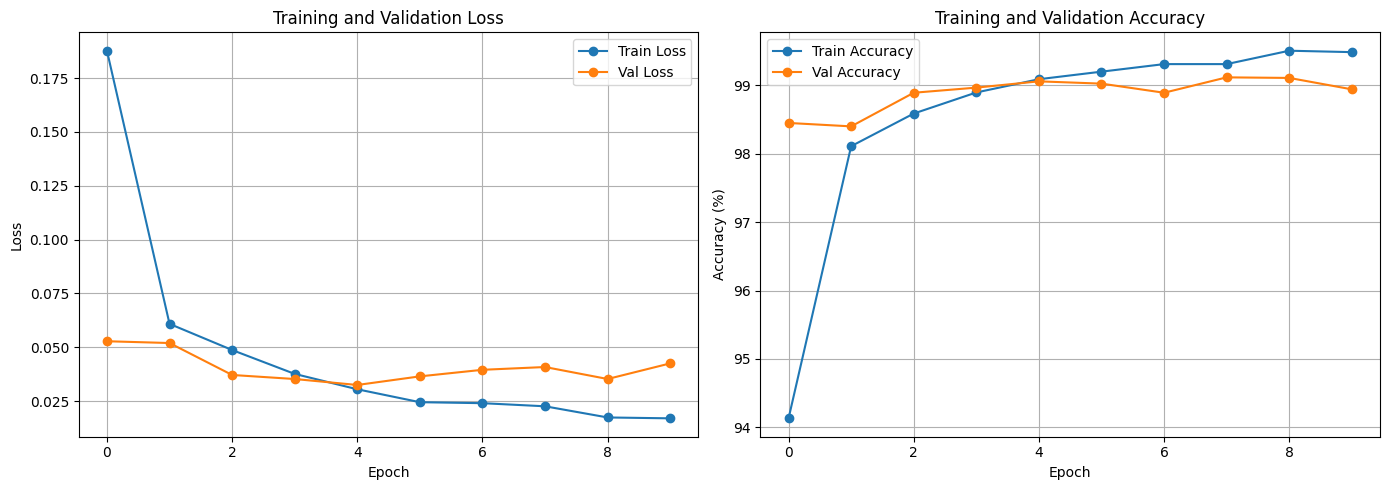


Evaluating on test set...

Test Accuracy: 0.9907

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      1.00      0.99      1032
           3       0.99      1.00      0.99      1010
           4       1.00      0.97      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.97      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



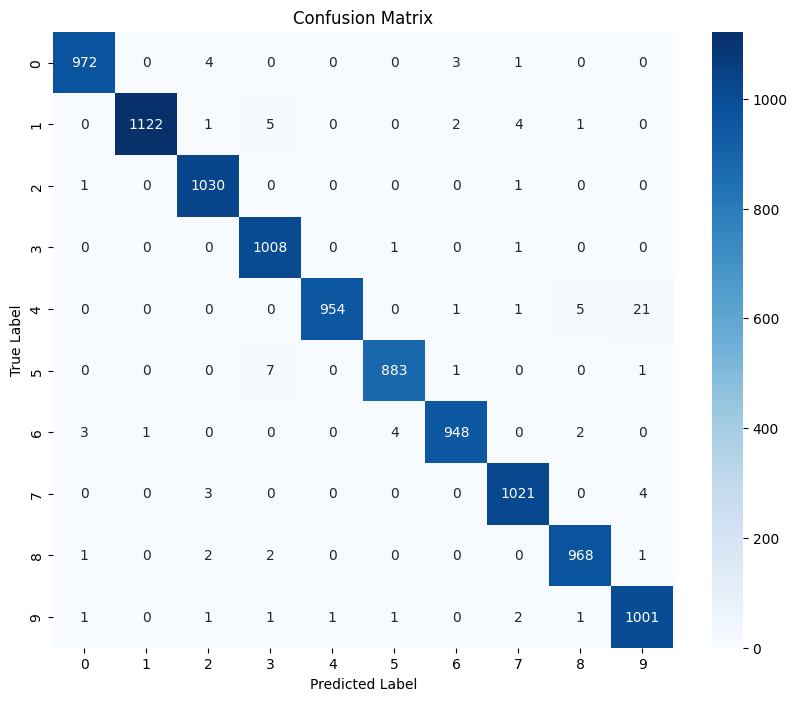


Visualizing predictions...


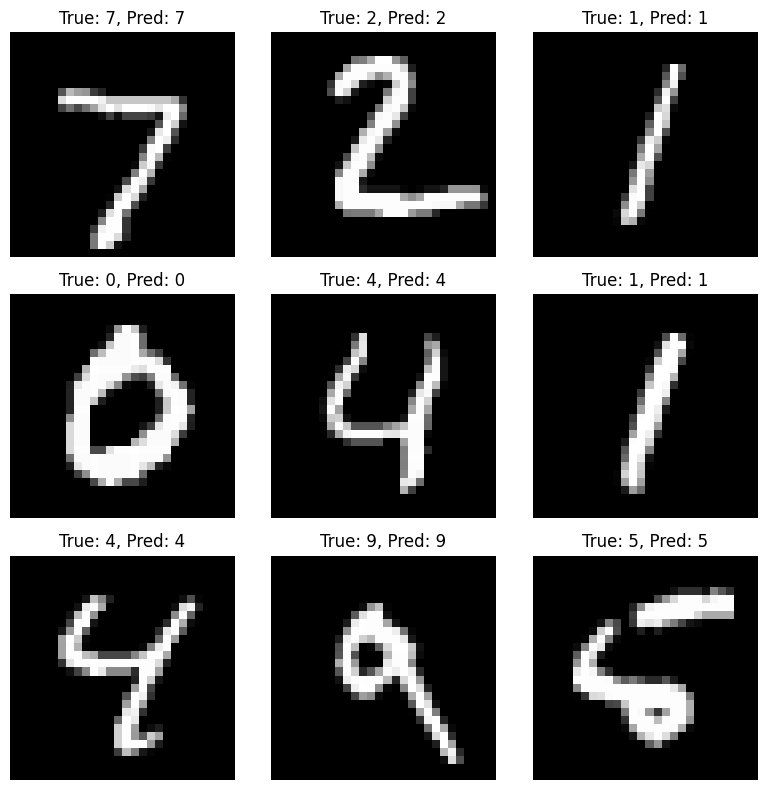

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")


class CNNModel(nn.Module):
    """
    Convolutional Neural Network for image classification
    """
    def __init__(self, num_classes=10):
        super(CNNModel, self).__init__()

        # First Convolutional Block
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(2, 2)

        # Second Convolutional Block
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(2, 2)

        # Third Convolutional Block
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(2, 2)

        # Fully Connected Layers
        self.fc1 = nn.Linear(128 * 3 * 3, 256)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, num_classes)

    def forward(self, x):
        # Conv Block 1
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.pool1(x)

        # Conv Block 2
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.pool2(x)

        # Conv Block 3
        x = self.conv3(x)
        x = self.bn3(x)
        x = self.relu3(x)
        x = self.pool3(x)

        # Flatten
        x = x.view(x.size(0), -1)

        # Fully Connected
        x = self.fc1(x)
        x = self.dropout(x)
        x = nn.ReLU()(x)
        x = self.fc2(x)
        x = nn.ReLU()(x)
        x = self.fc3(x)

        return x


class CNNTrainer:
    def __init__(self, model, device, learning_rate=0.001):
        self.model = model.to(device)
        self.device = device
        self.criterion = nn.CrossEntropyLoss()
        self.optimizer = optim.Adam(model.parameters(), lr=learning_rate)
        self.train_losses = []
        self.val_losses = []
        self.train_accuracies = []
        self.val_accuracies = []

    def train_epoch(self, train_loader):
        self.model.train()
        total_loss = 0
        correct = 0
        total = 0

        for images, labels in train_loader:
            images, labels = images.to(self.device), labels.to(self.device)

            # Forward pass
            outputs = self.model(images)
            loss = self.criterion(outputs, labels)

            # Backward pass
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()

            # Statistics
            total_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        avg_loss = total_loss / len(train_loader)
        accuracy = 100 * correct / total

        self.train_losses.append(avg_loss)
        self.train_accuracies.append(accuracy)

        return avg_loss, accuracy

    def validate(self, val_loader):
        self.model.eval()
        total_loss = 0
        correct = 0
        total = 0

        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(self.device), labels.to(self.device)

                outputs = self.model(images)
                loss = self.criterion(outputs, labels)

                total_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        avg_loss = total_loss / len(val_loader)
        accuracy = 100 * correct / total

        self.val_losses.append(avg_loss)
        self.val_accuracies.append(accuracy)

        return avg_loss, accuracy

    def train(self, train_loader, val_loader, epochs=10):
        print("Starting training...")
        for epoch in range(epochs):
            train_loss, train_acc = self.train_epoch(train_loader)
            val_loss, val_acc = self.validate(val_loader)

            print(f"Epoch [{epoch+1}/{epochs}] - Train Loss: {train_loss:.4f}, "
                  f"Train Acc: {train_acc:.2f}% - Val Loss: {val_loss:.4f}, "
                  f"Val Acc: {val_acc:.2f}%")

    def predict(self, test_loader):
        self.model.eval()
        all_preds = []
        all_labels = []

        with torch.no_grad():
            for images, labels in test_loader:
                images = images.to(self.device)
                outputs = self.model(images)
                _, predicted = torch.max(outputs, 1)

                all_preds.extend(predicted.cpu().numpy())
                all_labels.extend(labels.numpy())

        return np.array(all_preds), np.array(all_labels)

    def plot_metrics(self):
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))

        # Loss plot
        axes[0].plot(self.train_losses, label='Train Loss', marker='o')
        axes[0].plot(self.val_losses, label='Val Loss', marker='o')
        axes[0].set_xlabel('Epoch')
        axes[0].set_ylabel('Loss')
        axes[0].set_title('Training and Validation Loss')
        axes[0].legend()
        axes[0].grid(True)

        # Accuracy plot
        axes[1].plot(self.train_accuracies, label='Train Accuracy', marker='o')
        axes[1].plot(self.val_accuracies, label='Val Accuracy', marker='o')
        axes[1].set_xlabel('Epoch')
        axes[1].set_ylabel('Accuracy (%)')
        axes[1].set_title('Training and Validation Accuracy')
        axes[1].legend()
        axes[1].grid(True)

        plt.tight_layout()
        plt.show()


def load_dataset(dataset_name='mnist', batch_size=64):
    """
    Load MNIST or Fashion MNIST dataset

    Args:
        dataset_name: 'mnist' or 'fashion_mnist'
        batch_size: Batch size for DataLoader

    Returns:
        train_loader, val_loader, test_loader
    """
    print(f"Loading {dataset_name.upper()} dataset...")

    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])

    if dataset_name == 'mnist':
        train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
        test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
    else:
        train_data = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
        test_data = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

    # Split train into train and validation
    train_size = int(0.8 * len(train_data))
    val_size = len(train_data) - train_size
    train_data, val_data = torch.utils.data.random_split(train_data, [train_size, val_size])

    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

    print(f"Train samples: {len(train_data)}, Val samples: {len(val_data)}, Test samples: {len(test_data)}")

    return train_loader, val_loader, test_loader


def visualize_predictions(test_loader, model, device, num_samples=9):
    """
    Visualize predictions on test data
    """
    model.eval()
    images, labels = next(iter(test_loader))
    images = images[:num_samples].to(device)
    labels = labels[:num_samples]

    with torch.no_grad():
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

    fig, axes = plt.subplots(3, 3, figsize=(8, 8))
    for i, ax in enumerate(axes.flat):
        img = images[i].cpu().squeeze()
        ax.imshow(img, cmap='gray')
        ax.set_title(f"True: {labels[i]}, Pred: {predicted[i]}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()


# Main execution
if __name__ == "__main__":
    print("=" * 60)
    print("CNN Image Classification with Online Dataset")
    print("=" * 60)

    # Configuration
    dataset_choice = 'mnist'  # Change to 'fashion_mnist' for Fashion MNIST
    batch_size = 64
    epochs = 10
    learning_rate = 0.001

    # Load dataset
    train_loader, val_loader, test_loader = load_dataset(dataset_choice, batch_size)

    # Initialize model
    print("\nInitializing CNN model...")
    model = CNNModel(num_classes=10)
    print(model)

    # Create trainer
    trainer = CNNTrainer(model, device, learning_rate)

    # Train model
    trainer.train(train_loader, val_loader, epochs)

    # Plot metrics
    print("\nPlotting training metrics...")
    trainer.plot_metrics()

    # Predict on test set
    print("\nEvaluating on test set...")
    predictions, ground_truth = trainer.predict(test_loader)

    # Print evaluation metrics
    accuracy = accuracy_score(ground_truth, predictions)
    print(f"\nTest Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(ground_truth, predictions))

    # Confusion Matrix
    cm = confusion_matrix(ground_truth, predictions)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title('Confusion Matrix')
    plt.show()

    # Visualize predictions
    print("\nVisualizing predictions...")
    visualize_predictions(test_loader, model, device)
